In [1]:
import pyronn_torch
import numpy as np

In [2]:
projector = pyronn_torch.ConeBeamProjector(
    (128, 128, 128),  # volume shape
    (2.0, 2.0, 2.0),  # volume spacing in mm
    (-127.5, -127.5, -127.5),  # volume origin in mm
    (2, 480, 620),  # projection_shape (n, width, height)
    [1.0, 1.0],  # projection_spacing in mm
    (0, 0),  # projection_origin
    np.array([[[-3.10e+2, -1.20e+03,  0.00e+00,  1.86e+5],
               [-2.40e+2,  0.00e+00,  1.20e+03,  1.44e+5],
               [-1.00e+00,  0.00e+00,  0.00e+00,  6.00e+2]],
              [[-2.89009888e+2, -1.20522754e+3, -1.02473585e-13,
                1.86000000e+5],
               [-2.39963440e+2, -4.18857765e+0,  1.20000000e+3,
                1.44000000e+5],
               [-9.99847710e-01, -1.74524058e-2,  0.00000000e+0,
                6.00000000e+2]]])  # two projection matrices in shape (n, 3, 4)
                # optionally: source_isocenter_distance=1, source_detector_distance=1 for a scalar weighting the projections
)
projection = projector.new_projection_tensor(requires_grad=True)

projection = projection + 1.
result = projector.project_backward(projection, use_texture=True)

assert projection.requires_grad
assert result.requires_grad

loss = result.mean()
loss.backward()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from phantominator import shepp_logan

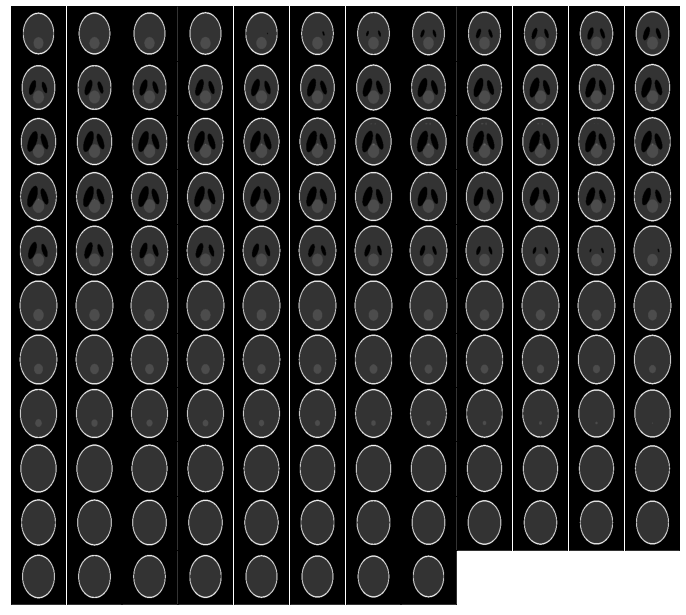

In [4]:
# Get a 3D phantom
ph = shepp_logan((128, 128, 128), zlims=(-.5, .5))

# Fancy dancing to nicely show all slices on same plot
nx = int(np.ceil(np.sqrt(ph.shape[-1])))
fig = plt.figure(figsize=(nx, nx))
for ii in range(ph.shape[-1]):
    ax = fig.add_subplot(nx, nx, ii+1)
    plt.imshow(ph[..., ii], cmap='gray')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_aspect('equal')
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [7]:
projector = pyronn_torch.ConeBeamProjector(
    (128, 128, 128),  # volume shape
    (2.0, 2.0, 2.0),  # volume spacing in mm
    (-127.5, -127.5, -127.5),  # volume origin in mm
    (1, 480, 620),  # projection_shape (n, width, height)
    [1.0, 1.0],  # projection_spacing in mm
    (0, 0),  # projection_origin
    np.array([[[-3.10e+2, -1.20e+03,  0.00e+00,  1.86e+5],
               [-2.40e+2,  0.00e+00,  1.20e+03,  1.44e+5],
               [-1.00e+00,  0.00e+00,  0.00e+00,  6.00e+2]]
              ])  # two projection matrices in shape (n, 3, 4)
                # optionally: source_isocenter_distance=1, source_detector_distance=1 for a scalar weighting the projections
)

In [8]:
import torch
ph_t = torch.from_numpy(ph)
proj = projector.project_forward(ph_t)
proj.shape

torch.Size([1, 480, 620])

In [9]:
vol = projector.project_backward(proj, use_texture=True)

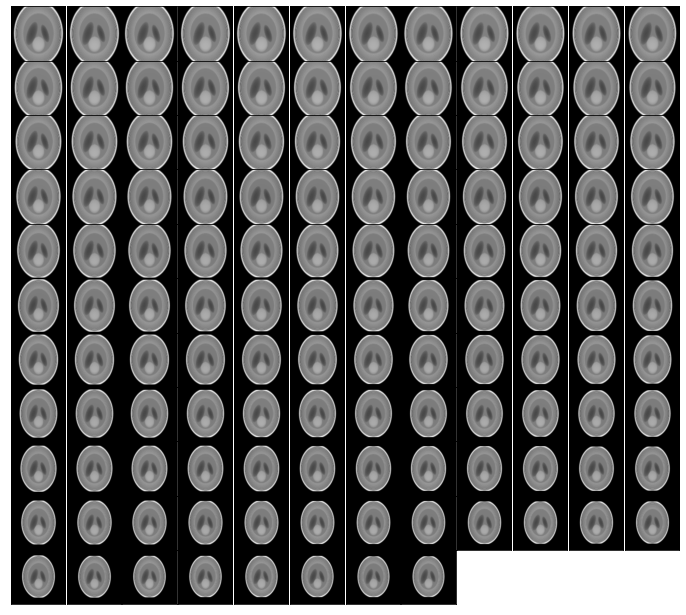

In [10]:
vol_ = vol.cpu().detach().numpy()
nx = int(np.ceil(np.sqrt(vol_.shape[-1])))
fig = plt.figure(figsize=(nx, nx))
for ii in range(vol_.shape[-1]):
    ax = fig.add_subplot(nx, nx, ii+1)
    plt.imshow(vol_[..., ii], cmap='gray')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_aspect('equal')
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

## change projector

In [99]:
m = np.array([[[-3.10e+2, -1.20e+03,  0.00e+00,  1.86e+5],
               [-2.40e+2,  0.00e+00,  1.20e+03,  1.44e+5],
               [-1.00e+00,  0.00e+00,  0.00e+00,  6.00e+2]],
              [[-2.89009888e+2, -1.20522754e+3, -1.02473585e-13,
                1.86000000e+5],
               [-2.39963440e+2, -4.18857765e+0,  1.20000000e+3,
                1.44000000e+5],
               [-9.99847710e-01, -1.74524058e-2,  0.00000000e+0,
                6.00000000e+2]]])  # two projection matrices in shape (n, 3, 4)
                # optionally: source_isocenter_distance=1, source_detector_distance=1 for a scalar weighting the projections

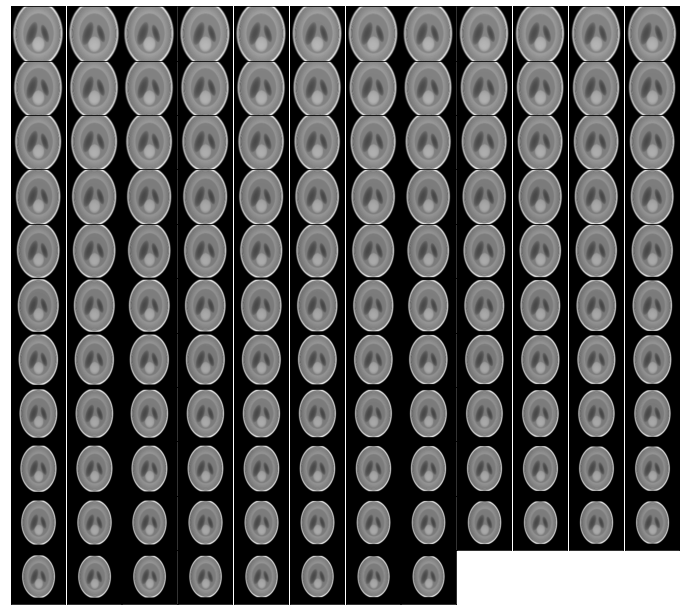

In [100]:
projector = pyronn_torch.ConeBeamProjector(
    (128, 128, 128),  # volume shape
    (2.0, 2.0, 2.0),  # volume spacing in mm
    (-127.5, -127.5, -127.5),  # volume origin in mm
    (2, 480, 620),  # projection_shape (n, width, height)
    [1.0, 1.0],  # projection_spacing in mm
    (0, 0),  # projection_origin
    m
)
proj = projector.project_forward(ph_t)
proj.shape
vol = projector.project_backward(proj, use_texture=True)
vol_ = vol.cpu().detach().numpy()
nx = int(np.ceil(np.sqrt(vol_.shape[-1])))
fig = plt.figure(figsize=(nx, nx))
for ii in range(vol_.shape[-1]):
    ax = fig.add_subplot(nx, nx, ii+1)
    plt.imshow(vol_[..., ii], cmap='gray')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_aspect('equal')
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()